In [7]:
import numpy as np
from pandas import DataFrame, set_option
import networkx as nx
import pylab as plt

#Constants

In [8]:
ROWS  =  10
COLS  =  10
GAMMA = 0.8

#Initial Q-Matrix and R-Matrix

In [9]:
Q = np.zeros((ROWS, COLS))
R = np.array([
                      
  [  0,    0,   -1,   -1,   -1,   -1,   -1,   -1,    0,   -1 ],
  [  0,   -1,    0,   -1,   -1,   -1,   -1,   -1,   -1,   -1 ],
  [ -1,    0,   -1,    0,   -1,   -1,   -1,   -1,   -1,   -1 ],
  [ -1,   -1,    0,   -1,   -1,   -1,    0,   -1,   -1,   -1 ],
  [ -1,   -1,   -1,   -1,   -1,    0,   -1,    0,   -1,   -1 ],
  [ -1,   -1,   -1,   -1,    0,   -1,    0,   -1,   -1,   -1 ],
  [ -1,   -1,   -1,    0,   -1,    0,   -1,   -1,   -1,    0 ],
  [ -1,   -1,   -1,   -1,    0,   -1,   -1,   -1,    0,   -1 ],
  [  0,   -1,   -1,   -1,   -1,   -1,   -1,    0,   -1,    0 ],
  [ -1,   -1,   -1,   -1,   -1,   -1,    0,   -1,    0,   -1 ]

], dtype=np.float32)

room_number = { (0,0): 0, (0,1): 1, (0,8): 8, (1,0): 0, (1,2): 2, (2,1): 1, (2,3): 3, 
                (3,2): 2, (3,6): 6, (4,5): 5, (4,7): 7, (5,4): 4, (5,6): 6, (6,3): 3, 
                (6,5): 5, (6,9): 9, (7,4): 4, (7,8): 8, (8,0): 0, (8,7): 7, (8,9): 9, 
                (9,6): 6, (9,8): 8 } 

targets = [(0,0), (1,0), (8,0)]
#print(Q, '\n','\n', R)

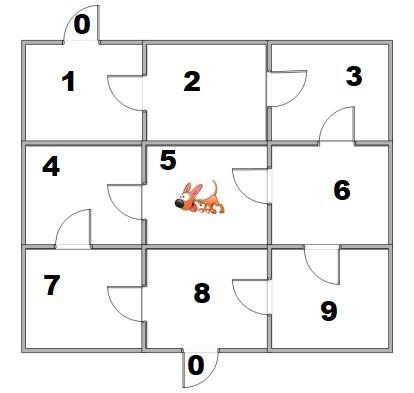

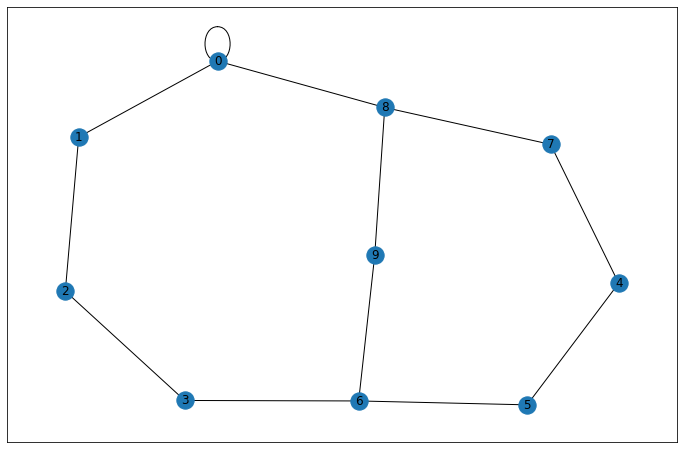

In [10]:
points = [(0,0), (0,1), (0,8), (1,2), (2,3), (3,6),
          (4,5), (4,7), (5,6), (6,9), (7,8), (8,9)]

plt.figure(figsize=(12,8))
G=nx.Graph()
G.add_edges_from(points)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

#Qlearning

In [11]:
def updateQ(Q, R, row, column):
  all_possible_moves = np.argwhere(R[column] != -1).T[0]
  Qpos_values = []
  for index in all_possible_moves:
    Qpos_values.append(R[column, index])

  Qpos_values = np.array(Qpos_values)
  Q[row, column] = R[row, column] + GAMMA * np.amax(Qpos_values)
  
  return Q
  
def init(R, in_state, targets):                                                             
  row = in_state
  if np.amax(R[row]) != 0 and np.amax(R[row]) != -1:
    max_value_index = np.argwhere(R[row] == np.amax(R[row])).T[0]
    random_ch = np.random.randint(max_value_index.shape[0])
    max_value_index = max_value_index[random_ch]
    column = max_value_index
  else:
    max_value_index = np.argwhere(R[row] != -1).T[0]
    random_ch = np.random.randint(max_value_index.shape[0])
    max_value_index = max_value_index[random_ch]
    column = max_value_index                                                                                                                                                 

  if (targets is not None) and (len(targets) != 0):
    for target in targets:
      if target == (row, column):
        R[row, column] = 100
        targets = targets.remove(target)
                                                                                   
  return row, column, R, targets

def check(R, row, column, trg):
  for target in trg:
    if target == (row, column):
      return True
  return False

def train(R, Q, targets, epochs):
  h_targets = [(0,0), (1,0), (8,0)]
  for _ in range(epochs):
    in_state = np.random.randint(ROWS)
    flag = False
    while flag == False:
      row, column, R, targets = init(R, in_state, targets)
      Q = updateQ(Q, R, row, column)
      in_state = column
      flag = check(R, row, column, h_targets)
    
    for i in range(ROWS):
      for j in range(COLS):
        if R[i][j] != -1:
          R[i][j] = Q[i][j]

  return R, Q, targets

def query(R, Q, targets):
  h_targets = [(0,0), (1,0), (8,0)]
  in_state = np.random.randint(ROWS)
  flag = False
  agent_muhtar = []
  while flag == False:
    row, column, R, targets = init(R, in_state, targets)
    agent_muhtar.append((row, column))  
    Q = updateQ(Q, R, row, column)
    in_state = column
    flag = check(R, row, column, h_targets)
  
  for i in range(ROWS):
    for j in range(COLS):
      if R[i][j] != -1:
        R[i][j] = Q[i][j]

  return R, Q, agent_muhtar


In [12]:
R, Q, targets = train(R, Q, targets, 20)

set_option("display.precision", 2)
# np.set_printoptions(precision=2)
print(DataFrame(R))
print('\n')
print(DataFrame(Q))
print('\n')


         0        1        2        3  ...        6    7       8        9
0     0.00   518.40    -1.00    -1.00  ...    -1.00 -1.0    0.00    -1.00
1  1441.44    -1.00     0.00    -1.00  ...    -1.00 -1.0   -1.00    -1.00
2    -1.00  3346.18    -1.00     0.00  ...    -1.00 -1.0   -1.00    -1.00
3    -1.00    -1.00  5788.16    -1.00  ...     0.00 -1.0   -1.00    -1.00
4    -1.00    -1.00    -1.00    -1.00  ...    -1.00  0.0   -1.00    -1.00
5    -1.00    -1.00    -1.00    -1.00  ...  3162.11 -1.0   -1.00    -1.00
6    -1.00    -1.00    -1.00  9297.92  ...    -1.00 -1.0   -1.00     0.00
7    -1.00    -1.00    -1.00    -1.00  ...    -1.00 -1.0  524.29    -1.00
8     0.00    -1.00    -1.00    -1.00  ...    -1.00  0.0   -1.00  2642.41
9    -1.00    -1.00    -1.00    -1.00  ...  7259.75 -1.0    0.00    -1.00

[10 rows x 10 columns]


         0        1        2        3  ...        6    7       8        9
0     0.00   518.40     0.00     0.00  ...     0.00  0.0    0.00     0.00
1  1441.44  

In [13]:
R, Q, agent_muhtar = query(R, Q, targets)

for elem in agent_muhtar:
  for key in room_number:
    if elem == key:
      print(f'Мухтар пішов у кімнату номер: {room_number[key]}')

set_option("display.precision", 2)
print('\n', '\n')
print(DataFrame(R))
print('\n', '\n')
print(DataFrame(Q))

Мухтар пішов у кімнату номер: 6
Мухтар пішов у кімнату номер: 3
Мухтар пішов у кімнату номер: 2
Мухтар пішов у кімнату номер: 1
Мухтар пішов у кімнату номер: 0

 

         0        1       2         3  ...         6    7       8        9
0     0.00   518.40    -1.0     -1.00  ...     -1.00 -1.0    0.00    -1.00
1  1856.16    -1.00     0.0     -1.00  ...     -1.00 -1.0   -1.00    -1.00
2    -1.00  4499.33    -1.0      0.00  ...     -1.00 -1.0   -1.00    -1.00
3    -1.00    -1.00  8465.1     -1.00  ...      0.00 -1.0   -1.00    -1.00
4    -1.00    -1.00    -1.0     -1.00  ...     -1.00  0.0   -1.00    -1.00
5    -1.00    -1.00    -1.0     -1.00  ...  10600.45 -1.0   -1.00    -1.00
6    -1.00    -1.00    -1.0  13928.45  ...     -1.00 -1.0   -1.00     0.00
7    -1.00    -1.00    -1.0     -1.00  ...     -1.00 -1.0  524.29    -1.00
8     0.00    -1.00    -1.0     -1.00  ...     -1.00  0.0   -1.00  2642.41
9    -1.00    -1.00    -1.0     -1.00  ...   7259.75 -1.0    0.00    -1.00

[10 rows x